<h1>Рекламные конструкции. Город Пенза</h1>
<a href = "https://docs.google.com/presentation/d/1TyYNGIHmbVnqHlQGgddLzxkcXmvHOzGCQFTpB7QNM-M/edit#slide=id.ga46fca1b50_0_64">Презентация в Google</a><br>
Аналитический проект на открытых данных. <br>
<b>Заказчик: </b> Самостоятельный проект. <br>
<b>Цель: </b> Найти полезные рекомендации для рекламодателей. <br>
<b>Описание проекта:</b> Этот проект придуман самостоятельно и сделан с использованием открытых данных для того, чтобы продемонстрировать возможности анализа данных. <br>
<b>Описание данных:</b> таблица получена с сайта <a href = "https://data.gov.ru/opendata/4027017947-advertising">Открытые данные России</a><br>
Структура данных: <br>
0   № разрешения<br>
1   Начало срока действия разрешения <br>
2   Окончание срока действия разрешения<br>
3   Организационно- правовая форма владельца<br>
4   Владелец рекламной конструкции<br>
5   Вид рекламной конструкции<br>
6   Размер рекламной конструкции<br>
7   Адрес размещения конструкции<br>
8   Вид собственности недвищимого имущества<br>
9   Основание на установку и эксплуатацию рекламной конструкции (Договор с собственником недвижимого имущества (далее ДСНИ) - для частной собственности; № договора - для муниципальной собственности)<br>
<b>План работы:</b><br>
Шаг 1. Получение данных и предобработка. <br>
Изменение названий столбцов на более короткие на английском языке. Проверка пропусков, дубликатов и значений данных. Замена типов данных даты и времени. Преобразование столбца "размер рекламной конструкции" в число с вычислением значения площади. <br>
ШАГ 2. Исследовательский анализ. <br>
Найти топ 10 самых активных владельцев рекламных конструкций. <br>
Найти топ 10 улиц, популярных для установки рекламных конструкций. <br>
Определить длительность каждого разрешения и площадь конструкций. <br>
Оценить корреляцию длительности разрешения и площади конструкции. Построить диаграмму рассеяния. <br>
Какие типы конструкций популярны у разных организационно-правовых форм. Построить тепловую карту. <br>
Шаг 3. Статистический анализ. <br>
Проверить гипотезу: средний размер рекламной конструкции различен для частных и муниципальных владельцев. <br>
Шаг 4. Когортный анализ. <br>
Разделить владельцев на когорты по году начала первого разрешения. <br>
Вычислить, сколько новых разрешений получают когорты по годам. Построить тепловую карту. <br>
Шаг 5. Общие выводы. 

<h2>Шаг 1. Получение данных и предобработка.</h2> 

In [170]:
#Получение данных и осмотр верхних строк таблицы. 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('penza_constructions.csv')
display(df.head())

,№ разрешения,Начало срока действия разрешения,Окончание срока действия разрешения,Организационно- правовая форма владельца,Владелец рекламной конструкции,Вид рекламной конструкции,Размер рекламной конструкции,Адрес размещения конструкции,Вид собственности недвищимого имущества,Основание на установку и эксплуатацию рекламной конструкции (Договор с собственником недвижимого имущества (далее ДСНИ) - для частной собственности; № договора - для муниципальной собственности)
0,92-14,41730,44651,ИП,Акжигитов Б.У.,Настенное панно (Эл. Экран),3х6,"пр. Строителей, 134 а",Частная,ДСНИ
1,96-14,41733,44654,ООО,Гипромаш,Световой короб,"0,8х3","ул. Кураева, 1 а",Частная,ДСНИ
2,97-14,41733,44654,ООО,Гипромаш,Световой короб,"0,8х3","ул. Кураева, 1 а",Частная,ДСНИ
3,98-14,41733,44654,ООО,Гипромаш,Световой короб,"0,8х3","ул. Кураева, 1 а",Частная,ДСНИ
4,99-14,41733,44654,ООО,Гипромаш,Световой короб,"0,8х3","ул. Кураева, 1 а",Частная,ДСНИ


In [171]:
print('Поиск дубликатов строк:',df.duplicated().sum())

Поиск дубликатов строк: 3


In [172]:
df = df.drop_duplicates()

In [173]:
#Переименование столбцов. 
df.columns = ['premission_id',
             'start',
             'end',
             'form', 
             'owner', 
             'type',
             'size',
             'adress', 
             'own_type', 
             'base']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   premission_id  1245 non-null   object
 1   start          1245 non-null   object
 2   end            1245 non-null   object
 3   form           1245 non-null   object
 4   owner          1245 non-null   object
 5   type           1245 non-null   object
 6   size           1242 non-null   object
 7   adress         1245 non-null   object
 8   own_type       1245 non-null   object
 9   base           1245 non-null   object
dtypes: object(10)
memory usage: 107.0+ KB


In [174]:
#Исследование пропусков в столбце 'Размер рекламной конструкции'. 
df[df['size'].isna()]

,premission_id,start,end,form,owner,type,size,adress,own_type,base
328,153-16,01.03.16,08.12.25,ООО,Пенза-Торг,Настенное панно,NaN,"пр-кт Строителей, 21 А",Частная,ДСНИ
451,258-16,16.08.16,13.06.24,ООО,Центр спортивной медицины Бароком,Бегущая строка,NaN,"пр-кт Победы, 69 а",Частная,ДСНИ
457,259-16,16.08.16,15.08.24,ФГБУ,РЭА ЦНТИ,Бегущая строка,NaN,"ул. Ульяновская, 1",Частная,ДСНИ


In [175]:
#Замена пропущенных значений размера на популярный размер для соответствующих типов конструкции. 
mode_panno = df[df['type'] == 'Настенное панно']['size'].mode()[0]
df[df['type'] == 'Настенное панно'] = df[df['type'] == 'Настенное панно'].fillna(mode_panno)
print('Популярный размер настенного панно:', mode_panno)

Популярный размер настенного панно: 2,5х5


In [176]:
mode_ticker = df[df['type'] == 'Бегущая строка']['size'].mode()[0]
df[df['type'] == 'Бегущая строка'] = df[df['type'] == 'Бегущая строка'].fillna(mode_ticker)
print('Популярный размер бегущей строки:', mode_ticker)

Популярный размер бегущей строки: 0,48х1,6


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   premission_id  1245 non-null   object
 1   start          1245 non-null   object
 2   end            1245 non-null   object
 3   form           1245 non-null   object
 4   owner          1245 non-null   object
 5   type           1245 non-null   object
 6   size           1245 non-null   object
 7   adress         1245 non-null   object
 8   own_type       1245 non-null   object
 9   base           1245 non-null   object
dtypes: object(10)
memory usage: 107.0+ KB


<h3>Диапазоны значений данных. </h3>

In [178]:
df['base'].value_counts()

ДСНИ      631
77-16       2
08-17       1
174-15      1
85-17       1
         ... 
168-16      1
111-16      1
85-18       1
49-15       1
01-19       1
Name: base, Length: 614, dtype: int64

In [179]:
df['adress'].value_counts()

пр. Строителей, 1 В                              53
ул. Калинина, 112 а                              33
ул. Окружная, 27 В                               12
ул. Володарского, 67                             10
ул. Кирова, 73                                    9
                                                 ..
ул. Калинина, 135 Б                               1
ул. Окружная, 37                                  1
пр-кт Строителей (р-н д. 2 Б по ул. Бородина)     1
ул. 40 лет Октября, 22 а (напротив)               1
пр. Победы (въезд на мост)                        1
Name: adress, Length: 889, dtype: int64

In [180]:
df['form'].value_counts()

ООО                  684
ФЛ                   259
ИП                   207
ЗАО                   46
ОАО                   22
АО                     8
ПАО                    6
МУП                    6
АНО НОУ СПО КПИиЭ      3
ТС                     1
АННМО                  1
ФГБУ                   1
МАУ                    1
Name: form, dtype: int64

<h3>Каковы размеры рекламных конструкций? </h3>

In [181]:
df.loc[424]

premission_id                       197-16
start                             12.04.16
end                               11.04.26
form                                   ООО
owner                                 Ашан
type                       Настенное панно
size                                 25х20
adress           ул. Центральная, 1 лит. Т
own_type                           Частная
base                                  ДСНИ
Name: 424, dtype: object

In [182]:
df['size'].unique()

array(['3х6', '0,8х3', '3,4х6,9', '0,56х2,64', '1,8х3', '3х9', '0,6х20',
       '2,88х5,76', '0,5х3', '0,75х14.3', '7,2х4,2', '3,5х2', '1,8х1,4',
       '1,8х1,3', '7х2,9', '6х12', '5,5х3,8', '5,0х4,5', '4х16', '2х3',
       '4,8х2,4', '7,2х0,6', '2,1х8,55', '3х36', '1х14', '2,5х7,5',
       '2,5х5', '2х1', '3,3х6', '2,6х2', '2,9х0,7', '2,9х0,6', '8х3,6',
       '1,8х1,2', '2х8', '3,5х0,95', '3,65х10,26', '3,65х6,71', '1,5х2,8',
       '1,5х1,5', '3,73х3,2', '4х3', '1х3,1', '1,5х0,5', '3,6х4,4',
       '0,9х1,5', '0,9х5', '0,9х6,5', '1,5х3,9', '1х16,5', '3,5х3,5',
       '2,5х4,5', '3,5х10', '0,5х0,4', '1,5х6', '2х2', '1х10,3', '1х1,5',
       '1,24х7,3', '1,8х2,8', '1,8х1,8', '2,55х4,2', '18х6', '19х7',
       '1,8х5,15', '2,5х22', '2,5х40', '2х5', '2х24', '2х57', '2х45',
       '4х6', '2,05х3,05', '2,5х12', '0,3х2,2', '3х3,4', '2,4х4,1',
       '2,5х0,7', '0,4х3,0', '0,5х18', '4х3,5', '(3х6)х2', '2х5,4',
       '(4х2)х1', '1,15х9,5', '1,5х22', '1,5х11', '1,6х1,6', '1,9х67',
       '0

In [183]:
def area_size(s):
    s_list = s.replace('(', '').replace(')', '').replace(',', '.').split('х')    
    i = 1
    for l in s_list:
        
        if l != '':
            i = i*float(l)
    return i

In [184]:
df['size'] = df['size'].apply(area_size)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 0 to 1247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   premission_id  1245 non-null   object 
 1   start          1245 non-null   object 
 2   end            1245 non-null   object 
 3   form           1245 non-null   object 
 4   owner          1245 non-null   object 
 5   type           1245 non-null   object 
 6   size           1245 non-null   float64
 7   adress         1245 non-null   object 
 8   own_type       1245 non-null   object 
 9   base           1245 non-null   object 
dtypes: float64(1), object(9)
memory usage: 147.0+ KB


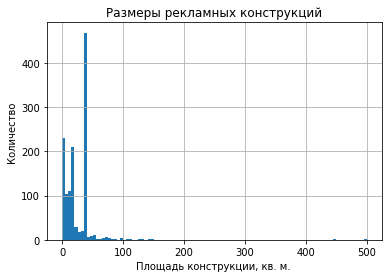

In [186]:
df['size'].hist(bins = 100)
plt.title('Размеры рекламных конструкций')
plt.xlabel('Площадь конструкции, кв. м. ')
plt.ylabel('Количество');

In [187]:
df[df['size'] == 500]

,premission_id,start,end,form,owner,type,size,adress,own_type,base
424,197-16,12.04.16,11.04.26,ООО,Ашан,Настенное панно,500.0,"ул. Центральная, 1 лит. Т",Частная,ДСНИ


In [188]:
df[df['premission_id'].duplicated()]

,premission_id,start,end,form,owner,type,size,adress,own_type,base
796,246-17,01.08.17,31.12.23,АО,БКС-Инвестиционный Банк,Настенное панно,8.1,"ул. М. Горького, 24",Частная,ДСНИ


In [189]:
df[df['premission_id'] == "246-17"]

,premission_id,start,end,form,owner,type,size,adress,own_type,base
405,246-17,15.07.16,14.07.26,ИП,Невзорова Маргарита Владимировна,Настенное панно,16.45,"ул. Центральная, 18",Частная,ДСНИ
796,246-17,01.08.17,31.12.23,АО,БКС-Инвестиционный Банк,Настенное панно,8.10,"ул. М. Горького, 24",Частная,ДСНИ


In [190]:
df = df.drop_duplicates(subset = 'premission_id')

In [191]:
print('Размер таблицы после удаления строк:', df.shape[0])

Размер таблицы после удаления строк: 1244


<b>Выводы из предобработки:</b> Данные успешно получены. В данных обнаружены дубликаты строк (3), пропуски в столбце 'size' (3). Столбцы с датой содержат нечитаемые значения. Некорректные написания размера конструкции, заканчивающиеся на знак 'х', без одного множителя (например, '(3х12)х')

<h2>Шаг 2. Исследовательский анализ. </h2>

<h3>Топ-10 владельцев конструкций. </h3>

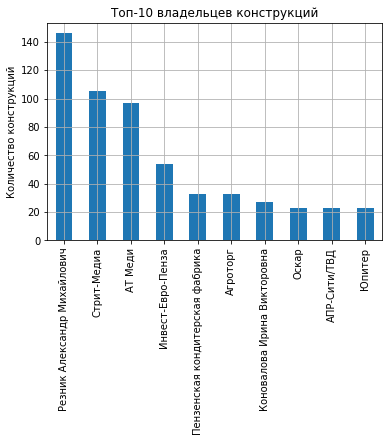

In [192]:
df['owner'].value_counts().head(10).plot(kind = 'bar', grid = True)
plt.title('Топ-10 владельцев конструкций')
plt.ylabel('Количество конструкций');

<h3>Топ-10 популярных улиц. </h3>

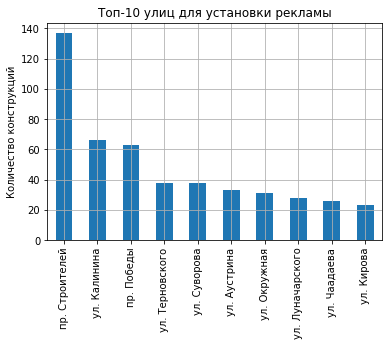

In [193]:
top10_street = df['adress'].apply(lambda x: x.split(',')[0]).value_counts().head(10)
top10_street.plot(kind = 'bar', grid = True)
plt.title('Топ-10 улиц для установки рекламы')
plt.ylabel('Количество конструкций'); 

In [194]:
df_filtered = df[df['start'].apply(lambda x: not x.isdigit())].copy()

In [195]:
print('Размер таблицы с корректными значениями даты:', df_filtered.shape[0])

Размер таблицы с корректными значениями даты: 1125


In [196]:
print('Количество строк с некорректными значениями даты:', df.shape[0] - df_filtered.shape[0])

Количество строк с некорректными значениями даты: 119


In [197]:
#Проверка значений в столбце 'end'.
df_filtered['end'].apply(lambda x: x.isdigit()).sum()

0

In [198]:
df_filtered['start'] = pd.to_datetime(df_filtered['start'])
df_filtered['end'] = pd.to_datetime(df_filtered['end'])

In [199]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 119 to 1247
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   premission_id  1125 non-null   object        
 1   start          1125 non-null   datetime64[ns]
 2   end            1125 non-null   datetime64[ns]
 3   form           1125 non-null   object        
 4   owner          1125 non-null   object        
 5   type           1125 non-null   object        
 6   size           1125 non-null   float64       
 7   adress         1125 non-null   object        
 8   own_type       1125 non-null   object        
 9   base           1125 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 96.7+ KB


In [200]:
df_filtered['duration'] = df_filtered['end'] - df_filtered['start']

In [201]:
df_filtered = df_filtered.query('start < end')

In [202]:
df_filtered['duration'].describe()

count                         1120
mean     2873 days 03:28:17.142857
std       642 days 11:38:32.970662
min              362 days 00:00:00
25%             2643 days 00:00:00
50%             2761 days 00:00:00
75%             3622 days 00:00:00
max             3967 days 00:00:00
Name: duration, dtype: object

In [203]:
df_filtered.shape[0]

1120

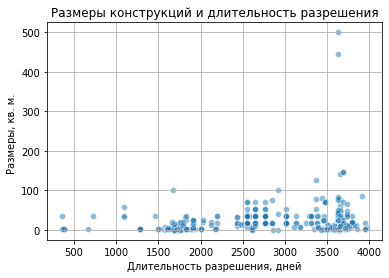

In [204]:
sns.scatterplot(x = df_filtered['duration'].dt.days, y = df_filtered['size'], alpha = 0.5)
plt.grid(True)
plt.title('Размеры конструкций и длительность разрешения')
plt.xlabel('Длительность разрешения, дней')
plt.ylabel('Размеры, кв. м. ');

In [205]:
print('Корреляция размера конструкции с длительностью разрешения: {:.2%}'.format( df_filtered['duration'].dt.days.corr(df_filtered['size'])))

Корреляция размера конструкции с длительностью разрешения: 0.72%


In [207]:
df['type'] = df['type'].apply(lambda x: x.lower())
df['type'].value_counts()

отдельно стоящая щитовая конструкция                        593
настенное панно                                             272
панель - кронштейн                                           76
настенное панно (бесфоновая конструкция)                     41
световой короб                                               41
крышная установка                                            28
пилон                                                        25
стела                                                        24
призмадинамическая конструкция                               24
электронный экран                                            14
настенное панно (световой короб)                             12
электронное табло (бегущая строка)                           10
объемно-световые буквы                                        8
модульная конструкция                                         8
бесфоновая конструкция с объемно-световыми буквами            7
панно                                   

In [208]:
#Замена значений 'type' на более простые. 
short_list = ('панно', 'экран', 'короб', 'кронштейн', 'конструкция', 'установка', 'другое')
def replace_type(text):
    if 'панно' in text: 
        return 'панно'
    elif 'экран' in text:
        return 'экран'
    elif 'короб' in text:
        return 'короб'
    elif 'кронштейн' in text:
        return 'кронштейн'
    elif 'щитовая конструкция' in text:
        return 'щит'
    elif 'установка' in text:
        return 'установка'
    else:
        return 'другое'

In [209]:
df['short_type'] = df['type'].apply(replace_type)

In [210]:
form_type = df.pivot_table(index = 'form', columns = 'short_type', values = 'premission_id', aggfunc = 'count')
form_type

short_type,другое,короб,кронштейн,панно,установка,щит,экран
form,,,,,,,
АННМО,1.0,NaN,NaN,NaN,NaN,NaN,NaN
АНО НОУ СПО КПИиЭ,NaN,NaN,1.0,2.0,NaN,NaN,NaN
АО,1.0,NaN,1.0,3.0,NaN,1.0,1.0
ЗАО,1.0,NaN,NaN,43.0,2.0,NaN,NaN
ИП,23.0,17.0,21.0,71.0,2.0,66.0,7.0
МАУ,NaN,NaN,NaN,1.0,NaN,NaN,NaN
МУП,NaN,NaN,4.0,NaN,NaN,2.0,NaN
ОАО,9.0,NaN,1.0,11.0,1.0,NaN,NaN
ООО,75.0,18.0,49.0,167.0,16.0,350.0,9.0


In [211]:
#Сортировка типов рекламных конструкций по популярности. 
type_sort = df['short_type'].value_counts().reset_index()['index']
type_sort

0          щит
1        панно
2       другое
3    кронштейн
4        короб
5    установка
6        экран
Name: index, dtype: object

In [212]:
#Сортировка организационно-правовых форм по популярности. 
form_sort = df['form'].value_counts().reset_index()['index'].reset_index()
form_sort

,level_0,index
0,0,ООО
1,1,ФЛ
2,2,ИП
3,3,ЗАО
4,4,ОАО
5,5,АО
6,6,ПАО
7,7,МУП
8,8,АНО НОУ СПО КПИиЭ
9,9,ТС


In [213]:
form_type = form_type[type_sort].reset_index()
form_type

short_type,form,щит,панно,другое,кронштейн,короб,установка,экран
0,АННМО,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,АНО НОУ СПО КПИиЭ,NaN,2.0,NaN,1.0,NaN,NaN,NaN
2,АО,1.0,3.0,1.0,1.0,NaN,NaN,1.0
3,ЗАО,NaN,43.0,1.0,NaN,NaN,2.0,NaN
4,ИП,66.0,71.0,23.0,21.0,17.0,2.0,7.0
5,МАУ,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,МУП,2.0,NaN,NaN,4.0,NaN,NaN,NaN
7,ОАО,NaN,11.0,9.0,1.0,NaN,1.0,NaN
8,ООО,350.0,167.0,75.0,49.0,18.0,16.0,9.0
9,ПАО,NaN,4.0,NaN,1.0,NaN,1.0,NaN


In [214]:
form_type = form_sort.merge(form_type, how = 'left', left_on = 'index', right_on = 'form').drop(columns = ['level_0', 'index']).set_index('form')

''

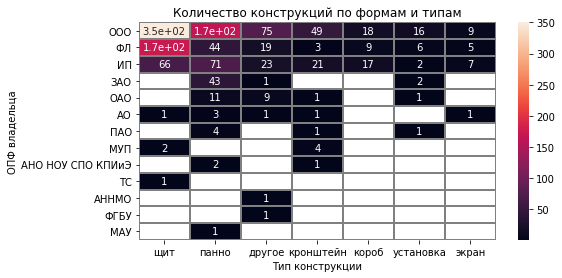

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 4))
sns.heatmap(form_type, annot = True, linewidths = 1, linecolor = 'grey')
plt.title('Количество конструкций по формам и типам')
plt.xlabel('Тип конструкции')
plt.ylabel('ОПФ владельца')
;

<h2>Шаг 3. Статистический анализ. </h2>
H0 (Нулевая гипотеза): средний размер конструкции не различается у частных и муниципальных собственников. <br>
H1 (Альтернативная гипотеза): средний размер конструкции различается у частных и муниципальных собственников. 

In [216]:
own_types = df['own_type'].unique()
sizes_df = pd.DataFrame(columns = own_types, index = ['Количество','Средний размер'])

In [217]:
for own_type in own_types:
    sizes_df[own_type]['Количество'] = df.query('own_type == @own_type').shape[0]
    sizes_df[own_type]['Средний размер'] = round(df.query('own_type == @own_type')['size'].mean(), 1)

In [233]:
display(sizes_df)

,Частная,Муниципальная
Количество,630,614
Средний размер,17.9,30.8


In [219]:
#Статистический тест для сравнения двух независимых выборок. 
from scipy.stats import ttest_ind
private_sizes = list(df.query('own_type == "Частная"')['size'])
municipal_sizes = list(df.query('own_type == "Муниципальная"')['size'])
result = ttest_ind(private_sizes, municipal_sizes)
print('Статистическая значимость теста p-value:', result[1])

Статистическая значимость теста p-value: 2.0224633706895593e-19


<h2>Шаг 4. Когортный анализ. </h2>
Описать активность когорт по годам. 

In [220]:
#Суммарная активность когорт владельцев рекламных конструкций. 
df_filtered['start_year'] = df_filtered['start'].dt.year
df_filtered['end_year'] = df_filtered['end'].dt.year
cohorts = df_filtered['start_year'].value_counts().reset_index().sort_values(by = 'index').query('index <= 2019')
cohorts

,index,start_year
3,2015,127
0,2016,380
1,2017,298
2,2018,246
4,2019,65


In [221]:
#Сводная таблица. Количество новых разрешений для владельцев конструкций по годам. 
start_users = df_filtered.pivot_table(index = 'owner', columns = 'start_year', values = 'premission_id', aggfunc = 'count')
start_users

start_year,2015,2016,2017,2018,2019,2020,2021,2022,2023
owner,,,,,,,,,
АККСБ КС Банк,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
АПР-Сити/ТВД,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
АТ Меди,NaN,53.0,33.0,1.0,1.0,1.0,1.0,1.0,1.0
Авангард,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
АвтоАвангард,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Эс класс клиник Пенза,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
Южный,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Юнастиль,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [222]:
#Индикатор когорты по году начала первого разрешения. 
first_year = df_filtered.groupby('owner').agg({'start_year':'min'})
first_year.columns = ['first_start_year']
first_year

,first_start_year
owner,
АККСБ КС Банк,2016
АПР-Сити/ТВД,2016
АТ Меди,2016
Авангард,2015
АвтоАвангард,2018
...,...
Эс класс клиник Пенза,2017
Южный,2015
Юнастиль,2016


In [223]:
#Создание когортной таблицы в несколько этапов. 
cohorts = df_filtered.merge(first_year.reset_index(), how = 'left', on = 'owner')
cohorts

,premission_id,start,end,form,owner,type,size,adress,own_type,base,duration,start_year,end_year,first_start_year
0,77-15,2015-02-03,2025-01-03,ООО,Пласт,Настенное панно,24.00,"пр-кт, Строителей, 152 Б",Частная,ДСНИ,3622 days,2015,2025,2015
1,101-15,2015-03-30,2025-01-02,ИП,Сорокина Л. Н.,Панель - кронштейн,1.75,"ул. Пушкина, 45",Частная,ДСНИ,3566 days,2015,2025,2015
2,142-15,2015-05-05,2025-04-05,ООО,Магазин № 52,Бегущая строка,1.20,"ул. Ленинградская, 7 (ТЦ Два Гуся)",Частная,ДСНИ,3623 days,2015,2025,2015
3,99-15,2015-03-16,2024-12-16,ФЛ,Седов Сергей Алексеевич,Настенное панно,9.00,"ул. Окружная, 111",Частная,ДСНИ,3563 days,2015,2024,2015
4,87-15,2015-02-03,2024-12-17,ФЛ,Седов Сергей Алексеевич,Настенное панно,14.00,"ул. Баумана, 30 м",Частная,ДСНИ,3605 days,2015,2024,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,89-19,2019-01-11,2024-10-31,ООО,Спектр-Авто,Стела,19.20,"ул. Беляева, 47",Муниципальная,29-19,2120 days,2019,2024,2019
1116,90-19,2019-01-11,2026-10-31,АО,ПО Компрессорные машины,Отдельно стоящая щитовая конструкция,18.00,"ФАД М-5, направление из Челябинска на Москву м...",Муниципальная,30-19,2850 days,2019,2026,2019
1117,91-19,2019-01-11,2026-10-31,ООО,СитиПроект,Отдельно стоящая щитовая конструкция,18.00,"ФАД М-5, направление из Челябинска на Москву м...",Муниципальная,38-19,2850 days,2019,2026,2019
1118,92-19,2019-01-11,2026-10-31,ООО,СитиПроект,Отдельно стоящая щитовая конструкция,18.00,"ФАД М-5, направление из Челябинска на Москву м...",Муниципальная,39-19,2850 days,2019,2026,2019


In [224]:
cohorts = cohorts.pivot_table(index = 'first_start_year', columns = 'start_year', values = 'premission_id', aggfunc = 'count')

In [225]:
cohorts = cohorts[range(2015,2020)]

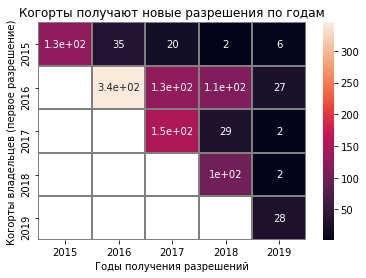

In [232]:
sns.heatmap(data = cohorts, annot = True, linewidths = 1, linecolor = 'grey')
plt.title('Когорты получают новые разрешения по годам')
plt.ylabel('Когорты владельцев (первое разрешение)')
plt.xlabel('Годы получения разрешений');

<h2>Шаг 5. Поиск освобождающихся мест.</h2>

In [227]:
df_filtered['street'] = df_filtered['adress'].apply(lambda x: x.split(',')[0])

In [228]:
end_street = top10_street.reset_index().merge(df_filtered.pivot_table(index = 'street', columns = 'end_year', values = 'premission_id', aggfunc = 'count'), how = 'left', left_on = 'index', right_on = 'street')

In [229]:
end_street = end_street.drop(columns = 'adress').set_index('index')

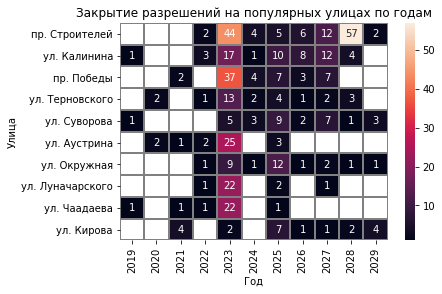

In [230]:
sns.heatmap(data = end_street, annot = True, linewidths = 1, linecolor = 'grey')
plt.title('Закрытие разрешений на популярных улицах по годам')
plt.ylabel('Улица')
plt.xlabel('Год');

In [234]:
df_filtered.to_csv('penza_constructions_filtered')

<h2>Шаг 6. Общие выводы. </h2>

Наиболее популярные у рекламодателей улицы загружены рекламными конструкциями. Однако действие разрешений ограничено, есть возможность отслеживать освобождающиеся места с помощью открытых данных. Например, многие разрешения на конструкции завершаются в 2023 году. Можно предположить, что это связано с предстоящими выборами Президента в 2024 году. Также в тепловой карте можно обнаружить, что многие разрешения заканчиваются в 2025, 2027 году. <br>
<br>
Можно найти наиболее активных владельцев рекламных конструкций (Резник Александр Михайлович, Стрит-Медиа, АТ Меди ...), <br>
И наиболее популярные улицы для установки конструкций (пр. Строителей, ул. Калинина, пр. Победы ... ) <br>
Можно описать историю появления действующих на момент публикации данных рекламных конструкций. Владельцы конструкций большинство разрешений получают в первый год своей активности. Высокие показатели активности показывает когорта владельцев 2016 года. <br>
<br>
Размер конструкции не имеет связи с длительностью действия разрешения (корреляция 0.72%). <br>
Размер конструкции статистически значимо отличается для частных и муниципальных собственников (средние размеры 17.9, 30.8 соответственно). <br>
<br>
Технические выводы: в исходных данных обнаружены ошибки. Полные дубликаты строк (3), дубликат номера разрешения (1), пропуски в столбце 'Размер рекламной конструкции', нечитаемые значения в столбцах даты (119), ошибки в датах время ('end' < 'start', 5). 